# Tau_p effects

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'beb606918461c91b007f25a007b71466d94cf516'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [104]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences, calculate_recall_success
from analysis_functions import calculate_recall_time_quantities, calculate_excitation_inhibition_ratio
from analysis_functions import calculate_total_connections
from plotting_functions import plot_weight_matrix, plot_winning_pattern

## How do the probabilities evolve in time depending on tau_p

#### An example

In [158]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 'p_pre', 'p_post', 'p_co', 'w']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Network parameters
tau_z_pre = 0.150
tau_p = 500.0

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, tau_p=tau_p, tau_z_pre=tau_z_pre)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build  protocol

protocol = Protocol()
sequences = [[i for i in range(n_patterns)]]

protocol.cross_protocol(sequences, training_time=training_time,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs)

manager.run_network_protocol(protocol=protocol, verbose=True)

('epochs', 0)
('epochs', 1)
('epochs', 2)


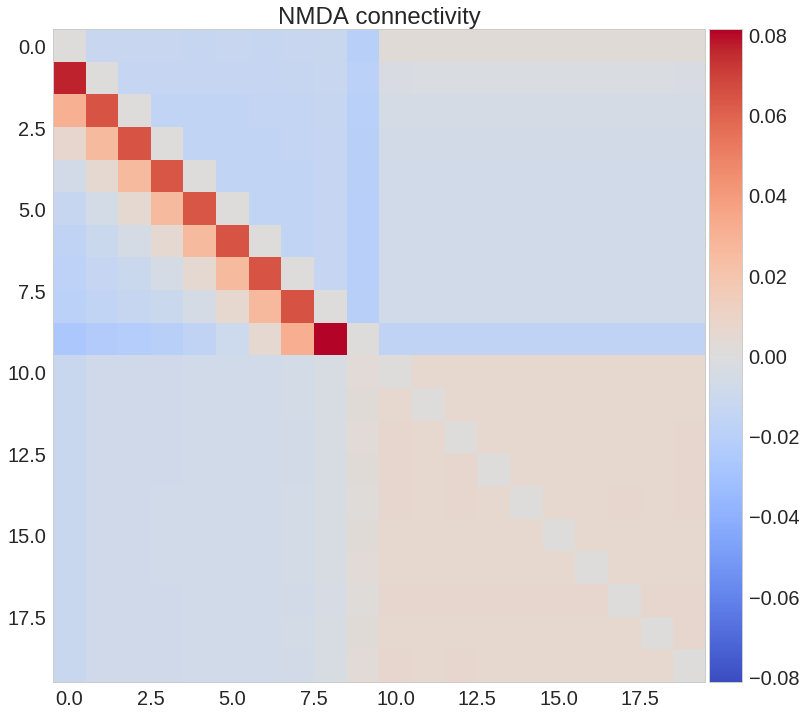

In [159]:
manager
plot_weight_matrix(manager.nn)

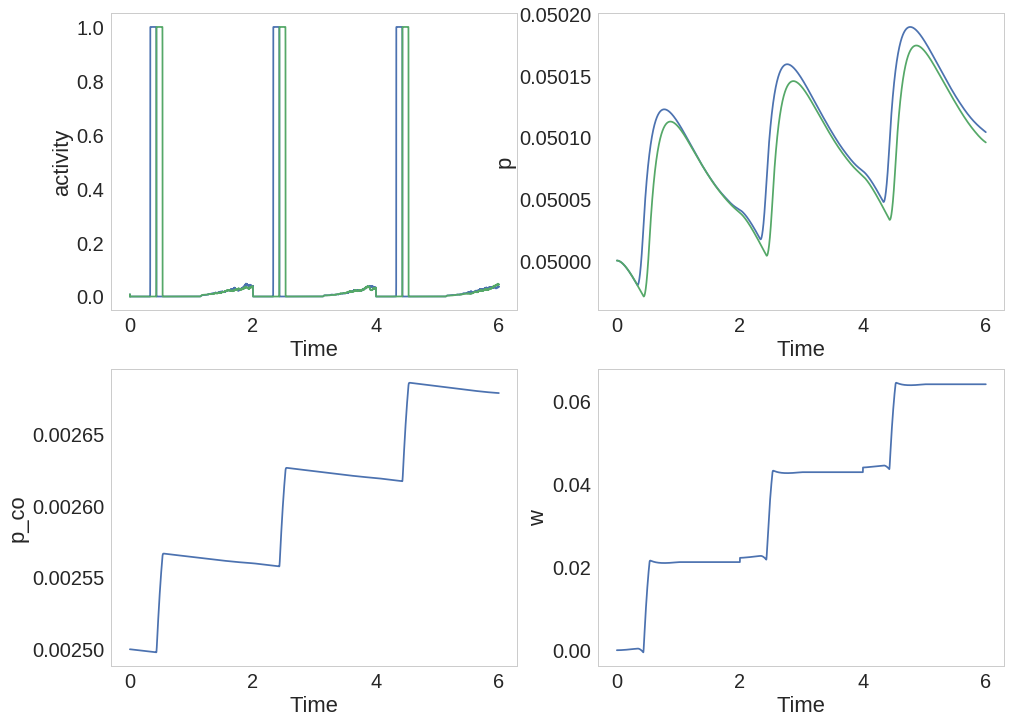

In [92]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

o = manager.history['o']
p_pre = manager.history['p_pre']
p_co = manager.history['p_co']
w = manager.history['w']

pattern_1 = 3
pattern_2 = 4

time = np.arange(0, manager.T_total, dt)

ax1.plot(time, o[:, pattern_1])
ax1.plot(time, o[:, pattern_2])
ax1.set_ylabel('activity')
ax1.set_xlabel('Time')

ax2.plot(time, p_pre[:, pattern_1])
ax2.plot(time, p_pre[:, pattern_2])
ax2.set_ylabel('p')
ax2.set_xlabel('Time')

ax3.plot(time, p_co[:, pattern_2, pattern_1])
ax3.set_ylabel('p_co')
ax3.set_xlabel('Time')

ax4.plot(time, w[:, pattern_2, pattern_1])
ax4.set_ylabel('w')
ax4.set_xlabel('Time');


In [171]:
nn.g_w = 15.0
nn.g_w_ampa = 15.0

In [172]:
total, mean, std, success = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
print('success', success)

('success', 100.0)


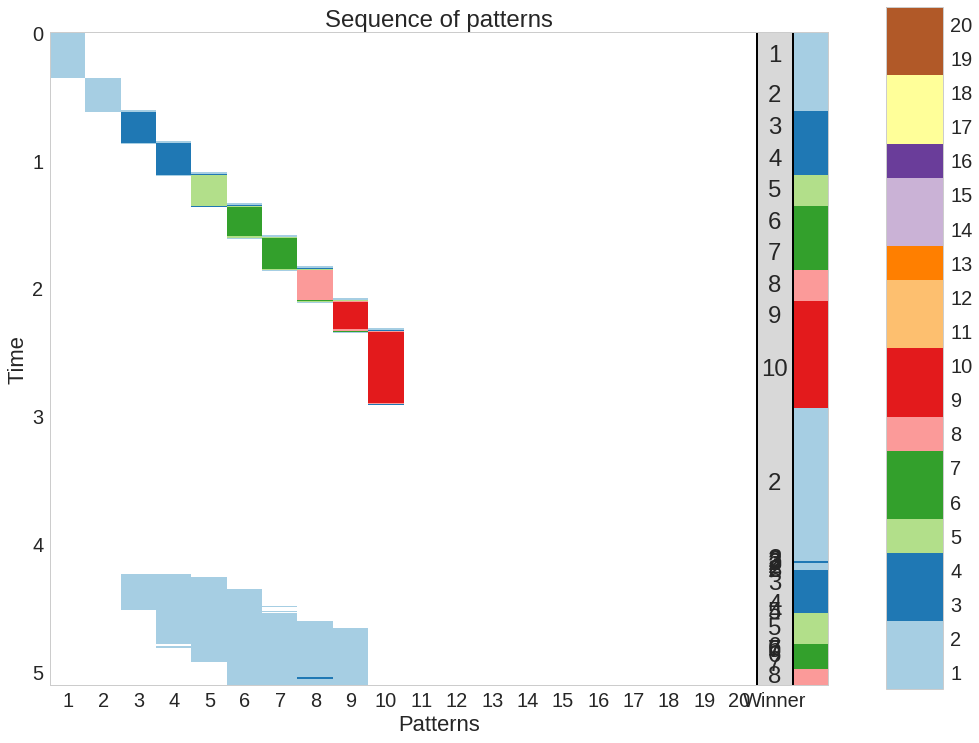

In [173]:
plot_winning_pattern(manager)

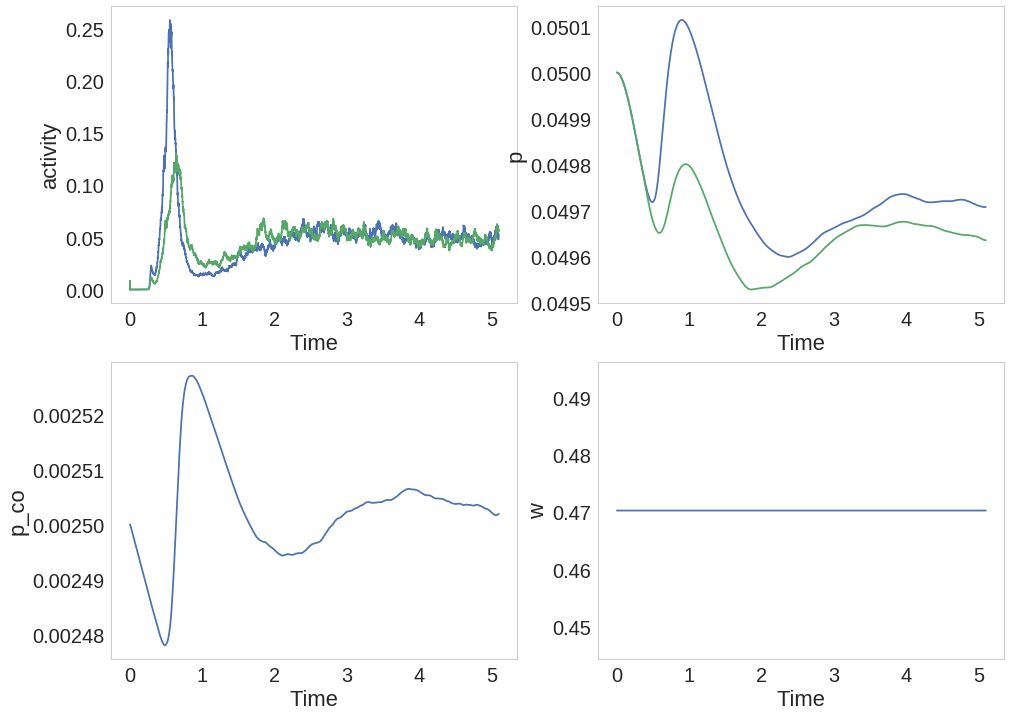

In [89]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

o = manager.history['o']
p_pre = manager.history['p_pre']
p_co = manager.history['p_co']
w = manager.history['w']

pattern_1 = 3
pattern_2 = 4

time = np.arange(0, manager.T_total, dt)

ax1.plot(time, o[:, pattern_1])
ax1.plot(time, o[:, pattern_2])
ax1.set_ylabel('activity')
ax1.set_xlabel('Time')

ax2.plot(time, p_pre[:, pattern_1])
ax2.plot(time, p_pre[:, pattern_2])
ax2.set_ylabel('p')
ax2.set_xlabel('Time')

ax3.plot(time, p_co[:, pattern_2, pattern_1])
ax3.set_ylabel('p_co')
ax3.set_xlabel('Time')

ax4.plot(time, w[:, pattern_2, pattern_1])
ax4.set_ylabel('w')
ax4.set_xlabel('Time');

#### Multiple values of tau_p

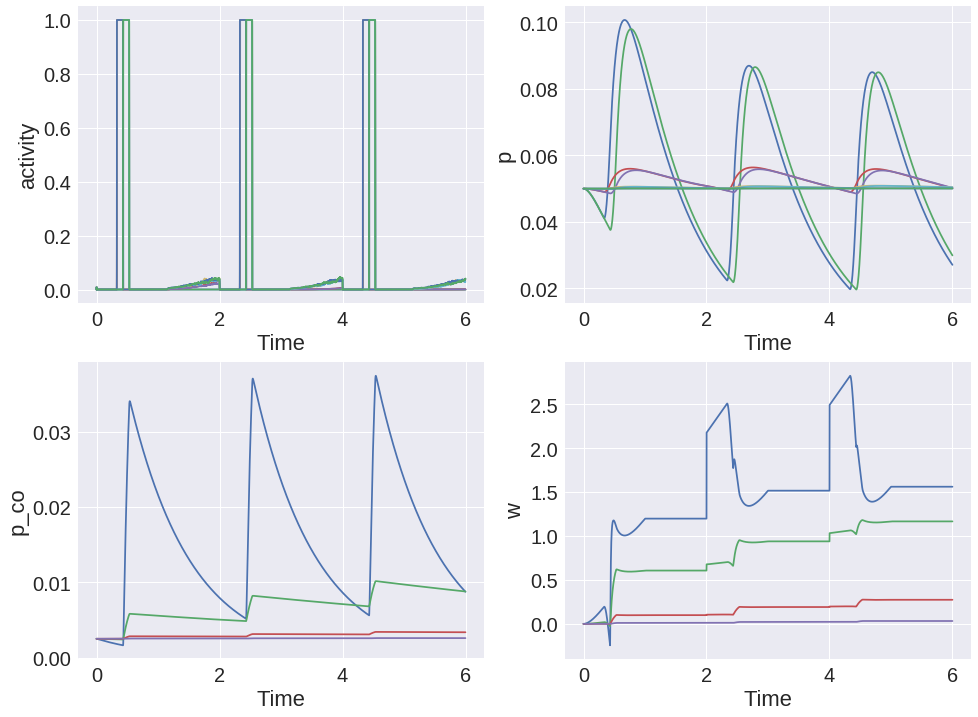

In [51]:
tau_p_list = [5.0, 20.0, 100.0, 1000.0]
tau_p_list = [10.0, 20.0, 30.0, 40.0]
tau_p_list = [1, 10, 100, 1000]

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pattern_1 = 3
pattern_2 = 4

# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 'p_pre', 'p_post', 'p_co', 'w']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Network parameters
tau_z_pre = 0.150
tau_p = 10.0

for tau_p in tau_p_list:
    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_p=tau_p, tau_z_pre=tau_z_pre)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build  protocol

    protocol = Protocol()
    sequences = [[i for i in range(n_patterns)]]

    protocol.cross_protocol(sequences, training_time=training_time,
                            inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    manager.run_network_protocol(protocol=protocol, verbose=False)
    
    # Plotting
    o = manager.history['o']
    p_pre = manager.history['p_pre']
    p_co = manager.history['p_co']
    w = manager.history['w']

    pattern_1 = 3
    pattern_2 = 4

    time = np.arange(0, manager.T_total, dt)

    ax1.plot(time, o[:, pattern_1])
    ax1.plot(time, o[:, pattern_2])
    ax1.set_ylabel('activity')
    ax1.set_xlabel('Time')

    ax2.plot(time, p_pre[:, pattern_1], label=str(tau_p))
    ax2.plot(time, p_pre[:, pattern_2], label=str(tau_p))
    ax2.set_ylabel('p')
    ax2.set_xlabel('Time')

    ax3.plot(time, p_co[:, pattern_2, pattern_1])
    ax3.set_ylabel('p_co')
    ax3.set_xlabel('Time')

    ax4.plot(time, w[:, pattern_2, pattern_1])
    ax4.set_ylabel('w')
    ax4.set_xlabel('Time')
    
    ax2.legend();

## Convergence and final weights based on tau_p

In [49]:
tau_p_vector = np.logspace(1.0, 2.0, num=15)
weights = []
weights_inhibition = []
weights_ampa = []
weights_free_attactor = []
exc_inh_ratio = []
exc_inh_ratio_ampa = []
mean_recall_time = []
recall_successes = []

from_pattern_inh = 0

from_pattern = 3
to_pattern = 4

T_recall = 5.0
T_cue = 0.100
I_cue = 0
n = 1

for tau_p in tau_p_vector:
    print('tau_p', tau_p)
    # Patterns parameters
    hypercolumns = 4
    minicolumns = 20
    n_patterns = 10

    # Manager properties
    dt = 0.001
    T_recalling = 5.0
    values_to_save = ['o']

    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_p=tau_p, tau_z_pre=tau_z_pre)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build  protocol

    protocol = Protocol()
    sequences = [[i for i in range(n_patterns)]]

    protocol.cross_protocol(sequences, training_time=training_time,
                            inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    manager.run_network_protocol(protocol=protocol, verbose=False)
    
    total, mean, std, success = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
    mean_ratio, std_ratio, aux = calculate_excitation_inhibition_ratio(nn, sequences, ampa=False)
    mean_ratio_ampa, std_ratio, aux = calculate_excitation_inhibition_ratio(nn, sequences, ampa=True)
    
    # Store
    weights.append(nn.w[to_pattern, from_pattern])
    weights_inhibition.append(nn.w[to_pattern, from_pattern_inh])
    weights_ampa.append(nn.w_ampa[0, minicolumns])
    weights_free_attactor.append(nn.w[to_pattern, n_patterns + 2])
    exc_inh_ratio.append(mean_ratio)
    exc_inh_ratio_ampa.append(mean_ratio_ampa)
    mean_recall_time.append(mean)
    recall_successes.append(success)

('tau_p', 10.0)
('tau_p', 11.787686347935873)
('tau_p', 13.894954943731374)
('tau_p', 16.378937069540637)
('tau_p', 19.306977288832496)
('tau_p', 22.758459260747887)
('tau_p', 26.826957952797258)
('tau_p', 31.622776601683793)
('tau_p', 37.275937203149397)
('tau_p', 43.939705607607905)
('tau_p', 51.794746792312097)
('tau_p', 61.054022965853264)
('tau_p', 71.968567300115211)
('tau_p', 84.834289824407165)
('tau_p', 100.0)


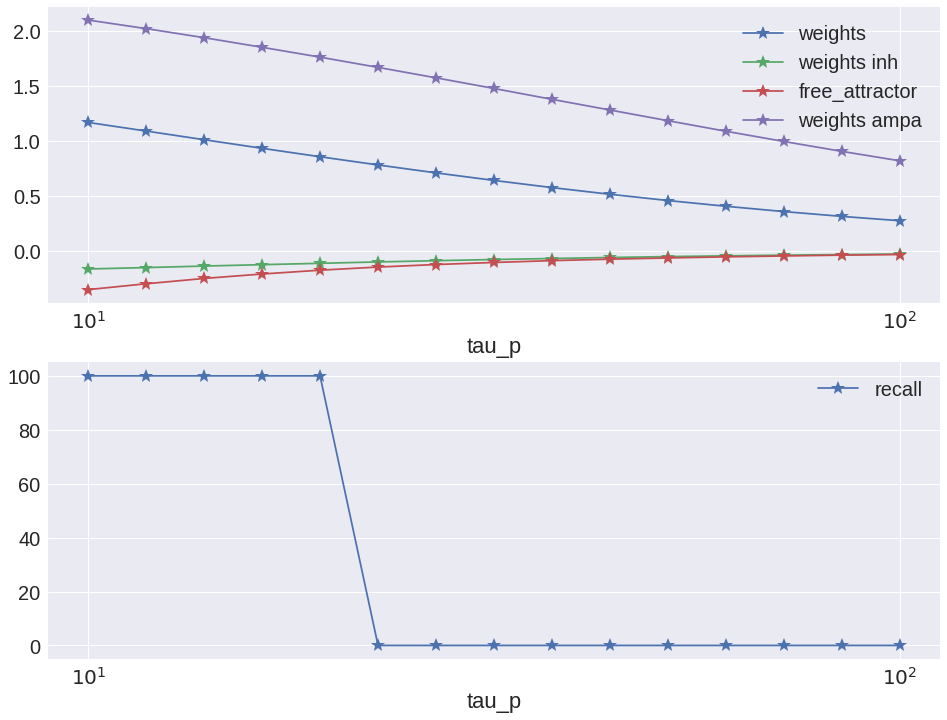

In [43]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(tau_p_vector, weights, '*-', markersize=15, label='weights')
ax1.plot(tau_p_vector, weights_inhibition, '*-', markersize=15, label='weights inh')
ax1.plot(tau_p_vector, weights_free_attactor, '*-', markersize=15, label='free_attractor')
ax1.plot(tau_p_vector, weights_ampa, '*-', markersize=15, label='weights ampa')

ax2.plot(tau_p_vector, recall_successes, '*-', markersize=15, label='recall')

ax1.set_xscale('log')
ax1.set_xlabel('tau_p')
ax1.legend()

ax2.set_xscale('log')
ax2.set_xlabel('tau_p')
ax2.legend();

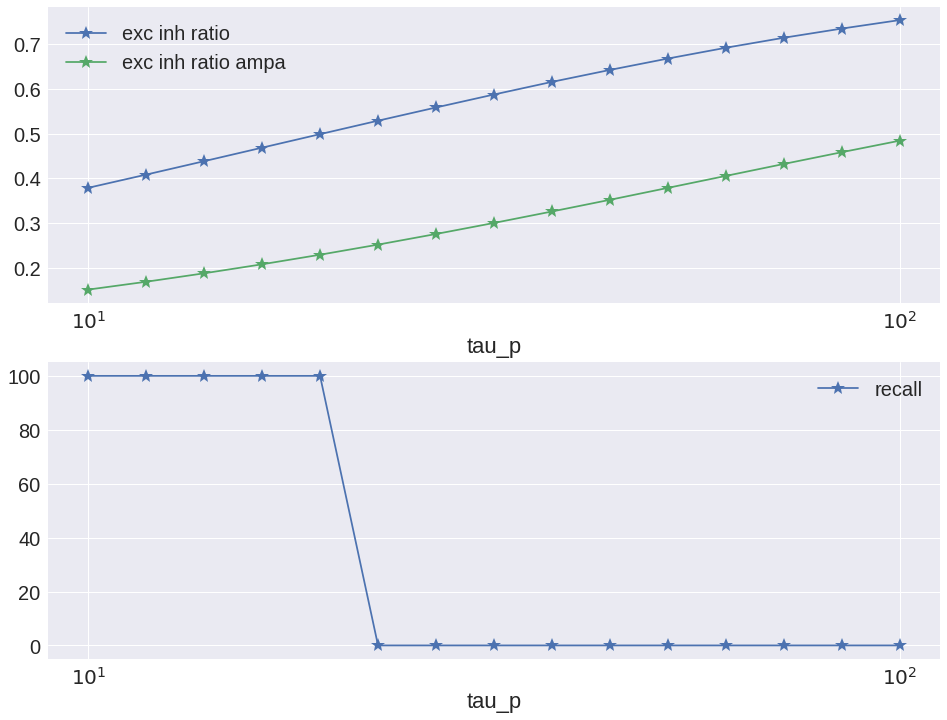

In [44]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(tau_p_vector, exc_inh_ratio, '*-', markersize=15, label='exc inh ratio')
ax1.plot(tau_p_vector, exc_inh_ratio_ampa, '*-', markersize=15, label='exc inh ratio ampa')
ax2.plot(tau_p_vector, recall_successes, '*-', markersize=15, label='recall')

ax1.set_xscale('log')
ax1.set_xlabel('tau_p')
ax1.legend()

ax2.set_xscale('log')
ax2.set_xlabel('tau_p')
ax2.legend();

## Two sequences assymetry in values

In [153]:
tau_p_vector = np.logspace(1.0, 4.0, num=20)
connectivities_1_list = []
connectivities_2_list = []
connectivities_3_list = []
connectivities_4_list = []
connectivities_5_list = []
connectivities_6_list = []

# Patterns parameters
hypercolumns = 4
minicolumns = 35

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 2.0
inter_pulse_interval = 0.0
epochs = 3

tau_z_pre = 0.150
sigma = 0
tau_p = 1000.0

for tau_p in tau_p_vector:
    print('tau p', tau_p)

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, sigma=sigma, tau_p=tau_p)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build a protocol
    protocol = Protocol()
    sequences = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], 
                [20, 21, 22, 23 ,24], [25, 26, 27, 28, 29]]
    protocol.cross_protocol(sequences, training_time=training_time,
                                inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    manager.run_network_protocol(protocol=protocol, verbose=False)


    from_pattern = 3
    to_pattern = 4
    connectivity_seq_1 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)

    from_pattern = 8
    to_pattern = 9
    connectivity_seq_2 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)

    from_pattern = 13
    to_pattern = 14
    connectivity_seq_3 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)

    from_pattern = 13
    to_pattern = 14
    connectivity_seq_3 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)

    from_pattern = 18
    to_pattern = 19
    connectivity_seq_4 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)
    
    from_pattern = 23
    to_pattern = 24
    connectivity_seq_5 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)
    
    from_pattern = 28
    to_pattern = 29
    connectivity_seq_6 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=False, normalize=True)

    connectivities_1_list.append(connectivity_seq_1)
    connectivities_2_list.append(connectivity_seq_2)
    connectivities_3_list.append(connectivity_seq_3)
    connectivities_4_list.append(connectivity_seq_4)
    connectivities_5_list.append(connectivity_seq_5)
    connectivities_6_list.append(connectivity_seq_6)

('tau p', 10.0)
('tau p', 14.384498882876629)
('tau p', 20.691380811147901)
('tau p', 29.763514416313178)
('tau p', 42.813323987193932)
('tau p', 61.584821106602639)
('tau p', 88.586679041008225)
('tau p', 127.42749857031335)
('tau p', 183.29807108324357)
('tau p', 263.66508987303581)
('tau p', 379.26901907322497)
('tau p', 545.55947811685144)
('tau p', 784.75997035146065)
('tau p', 1128.8378916846884)
('tau p', 1623.776739188721)
('tau p', 2335.7214690901214)
('tau p', 3359.8182862837812)
('tau p', 4832.9302385717519)
('tau p', 6951.9279617756056)
('tau p', 10000.0)


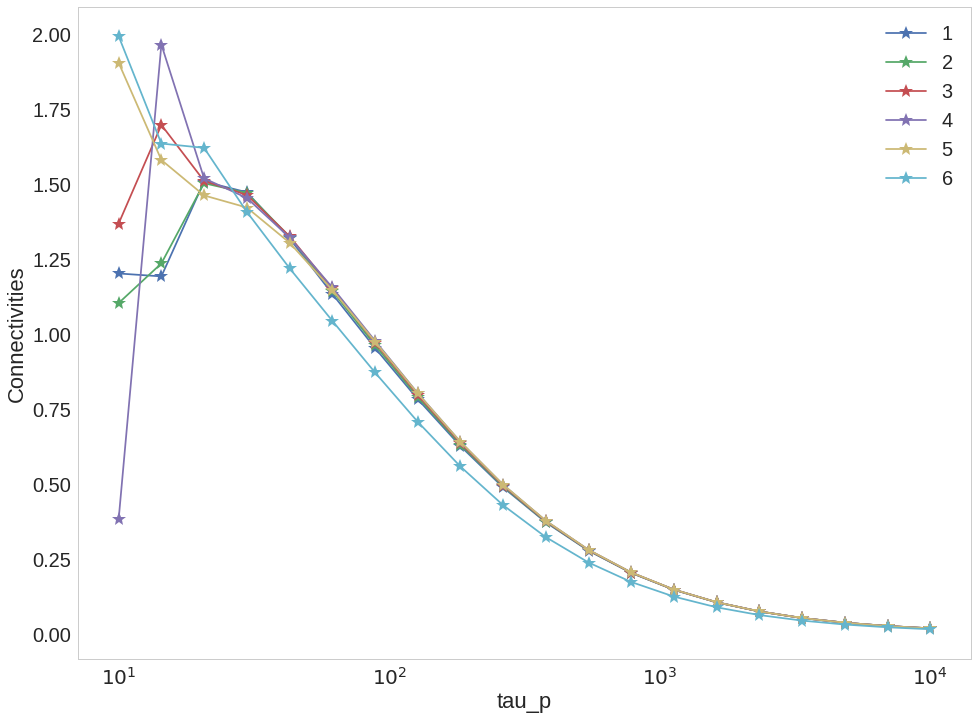

In [155]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_p_vector, connectivities_1_list, '*-', markersize=15, label='1')
ax.plot(tau_p_vector, connectivities_2_list, '*-', markersize=15, label='2')
ax.plot(tau_p_vector, connectivities_3_list, '*-', markersize=15, label='3')
ax.plot(tau_p_vector, connectivities_4_list, '*-', markersize=15, label='4')
ax.plot(tau_p_vector, connectivities_5_list, '*-', markersize=15, label='5')
ax.plot(tau_p_vector, connectivities_6_list, '*-', markersize=15, label='6')

ax.set_xscale('log')
ax.set_xlabel('tau_p')
ax.set_ylabel('Connectivities')

ax.legend();

## Do previous sequences stick?

In [326]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

sigma = 0
tau_z_pre = 0.200
tau_p = 100.0

# Sequence structure
overlap = 2
number_of_sequences = 5
half_width = 2

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, sigma=sigma, tau_p=tau_p)
# Buidl the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build chain protocol
chain_protocol = Protocol()
units_to_overload = [i for i in range(overlap)]
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
chain_protocol.cross_protocol(sequences, training_time=training_time,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Run the manager
manager.run_network_protocol(protocol=chain_protocol, verbose=True)

print(sequences)

nn.g_w = 15.0
nn.g_w_ampa = 1.0
nn.tau_z_pre = 0.400
nn.tau_a = 2.7
successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n,
                                                       sequences=sequences)

('epochs', 0)
('epochs', 1)
('epochs', 2)
[[2, 3, 0, 1, 4, 5], [6, 7, 0, 1, 8, 9], [10, 11, 0, 1, 12, 13], [14, 15, 0, 1, 16, 17], [18, 19, 0, 1, 20, 21]]


In [327]:
successes

[100.0, 100.0, 100.0, 100.0, 100.0]

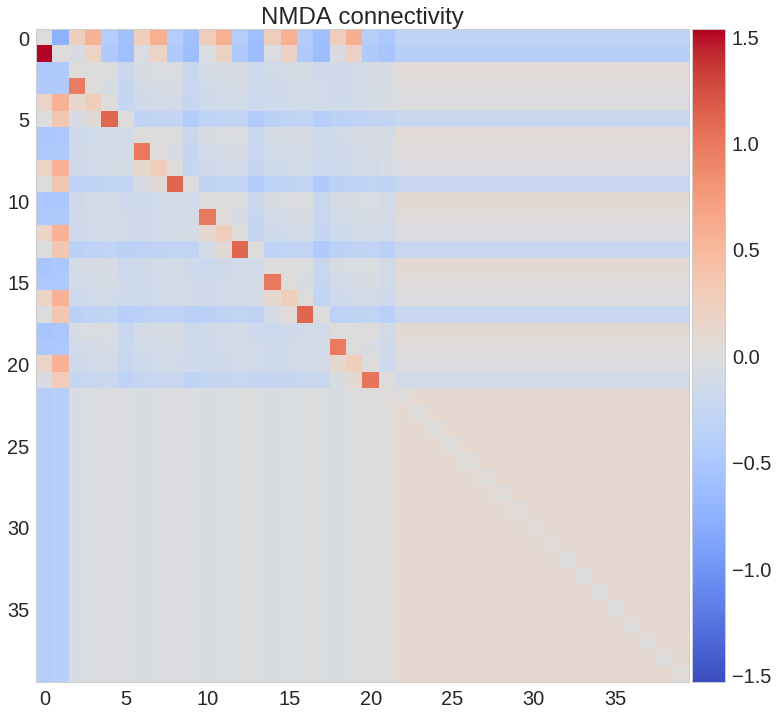

In [314]:
plot_weight_matrix(manager.nn)

In [315]:
ampa = False

from_pattern = 1
to_pattern = 4
connectivity_seq_1 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=ampa, normalize=True)

from_pattern = 1
to_pattern = 8
connectivity_seq_2 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=ampa, normalize=True)

from_pattern = 1
to_pattern = 12
connectivity_seq_3 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=ampa, normalize=True)

from_pattern = 1
to_pattern = 16
connectivity_seq_4 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=ampa, normalize=True)

from_pattern = 1
to_pattern = 20
connectivity_seq_5 = calculate_total_connections(manager, from_pattern, to_pattern, ampa=ampa, normalize=True)

print('connectivit 1', connectivity_seq_1)
print('connectivit 2', connectivity_seq_2)
print('connectivit 3', connectivity_seq_3)
print('connectivit 4', connectivity_seq_4)
print('connectivit 5', connectivity_seq_5)

('connectivit 1', 0.55660286283707316)
('connectivit 2', 0.56367278149296574)
('connectivit 3', 0.56919017080601075)
('connectivit 4', 0.5712203875653814)
('connectivit 5', 0.57091356331716614)


{'tau_z_post': 0.005, 'tau_m': 0.05, 'G': 1.0, 'tau_z_pre': 0.5, 'sigma': 0, 'g_w': 15.0, 'tau_z_post_ampa': 0.005, 'epsilon': 1e-20, 'tau_a': 2.7, 'g_beta': 1, 'g_w_ampa': 1.0, 'g_I': 10.0, 'tau_z_pre_ampa': 0.005, 'g_a': 97.0, 'k': 0, 'tau_p': 100.0}
('succes', 100.0)
[2, 3, 0, 1, 4, 5]
[(2, 0.27000000000000002, 0.0, 0.26900000000000002), (3, 0.502, 0.26900000000000002, 0.77000000000000002), (0, 0.28100000000000003, 0.77000000000000002, 1.05), (1, 1.262, 1.05, 2.3109999999999999), (4, 0.28200000000000003, 2.3109999999999999, 2.5920000000000001), (5, 2.5070000000000001, 2.5920000000000001, 5.0979999999999999)]


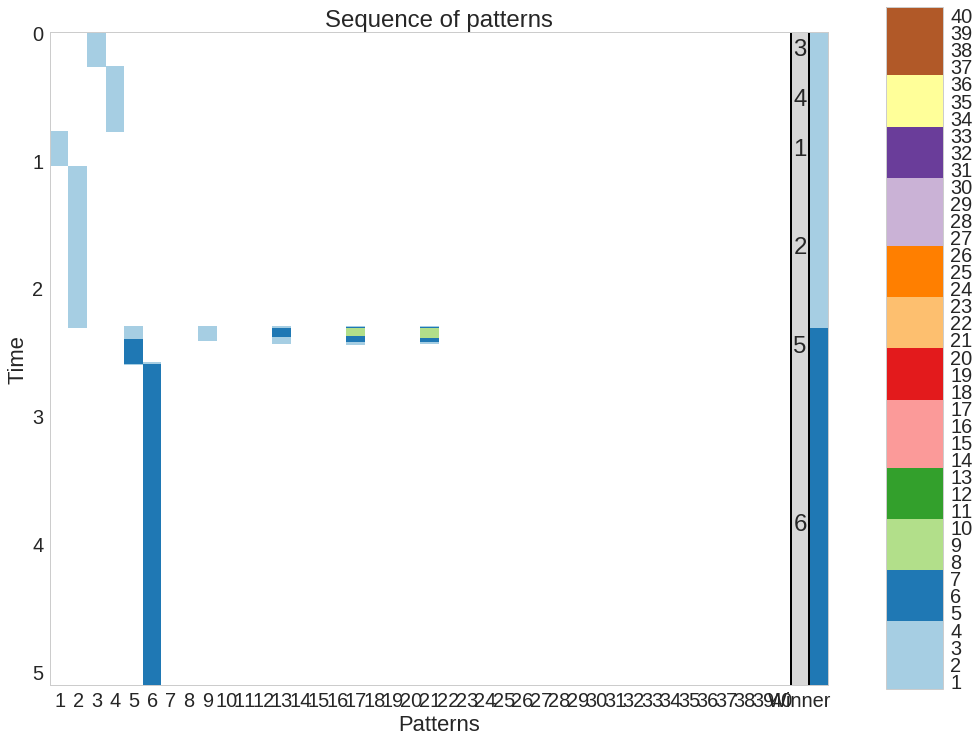

In [322]:
from analysis_functions import calculate_timings
nn.g_w = 15.0
nn.g_w_ampa = 1.0
nn.tau_a = 2.7 
nn.tau_z_pre = 0.500

print(nn.get_parameters())
T_recall = 5.0
T_cue = 0.100
n = 1
sequence = 0
patterns_indexes = sequences[sequence]
success_1 = calculate_recall_success(manager, T_recall=T_recall, I_cue=patterns_indexes[0],
                                     T_cue=T_cue, n=n, patterns_indexes=patterns_indexes)
timings = calculate_timings(manager, remove=0.010)
print('succes', success_1)

plot_winning_pattern(manager)
print(patterns_indexes)
print(timings)

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])